# Week 2
Embedding through vectorisation can help better classify instead of just tokenisaing words to numbers. 
E.g. Canine and Dog may have a similar vector. 

These Vectorisations can be embedded into a multidimensiontal space


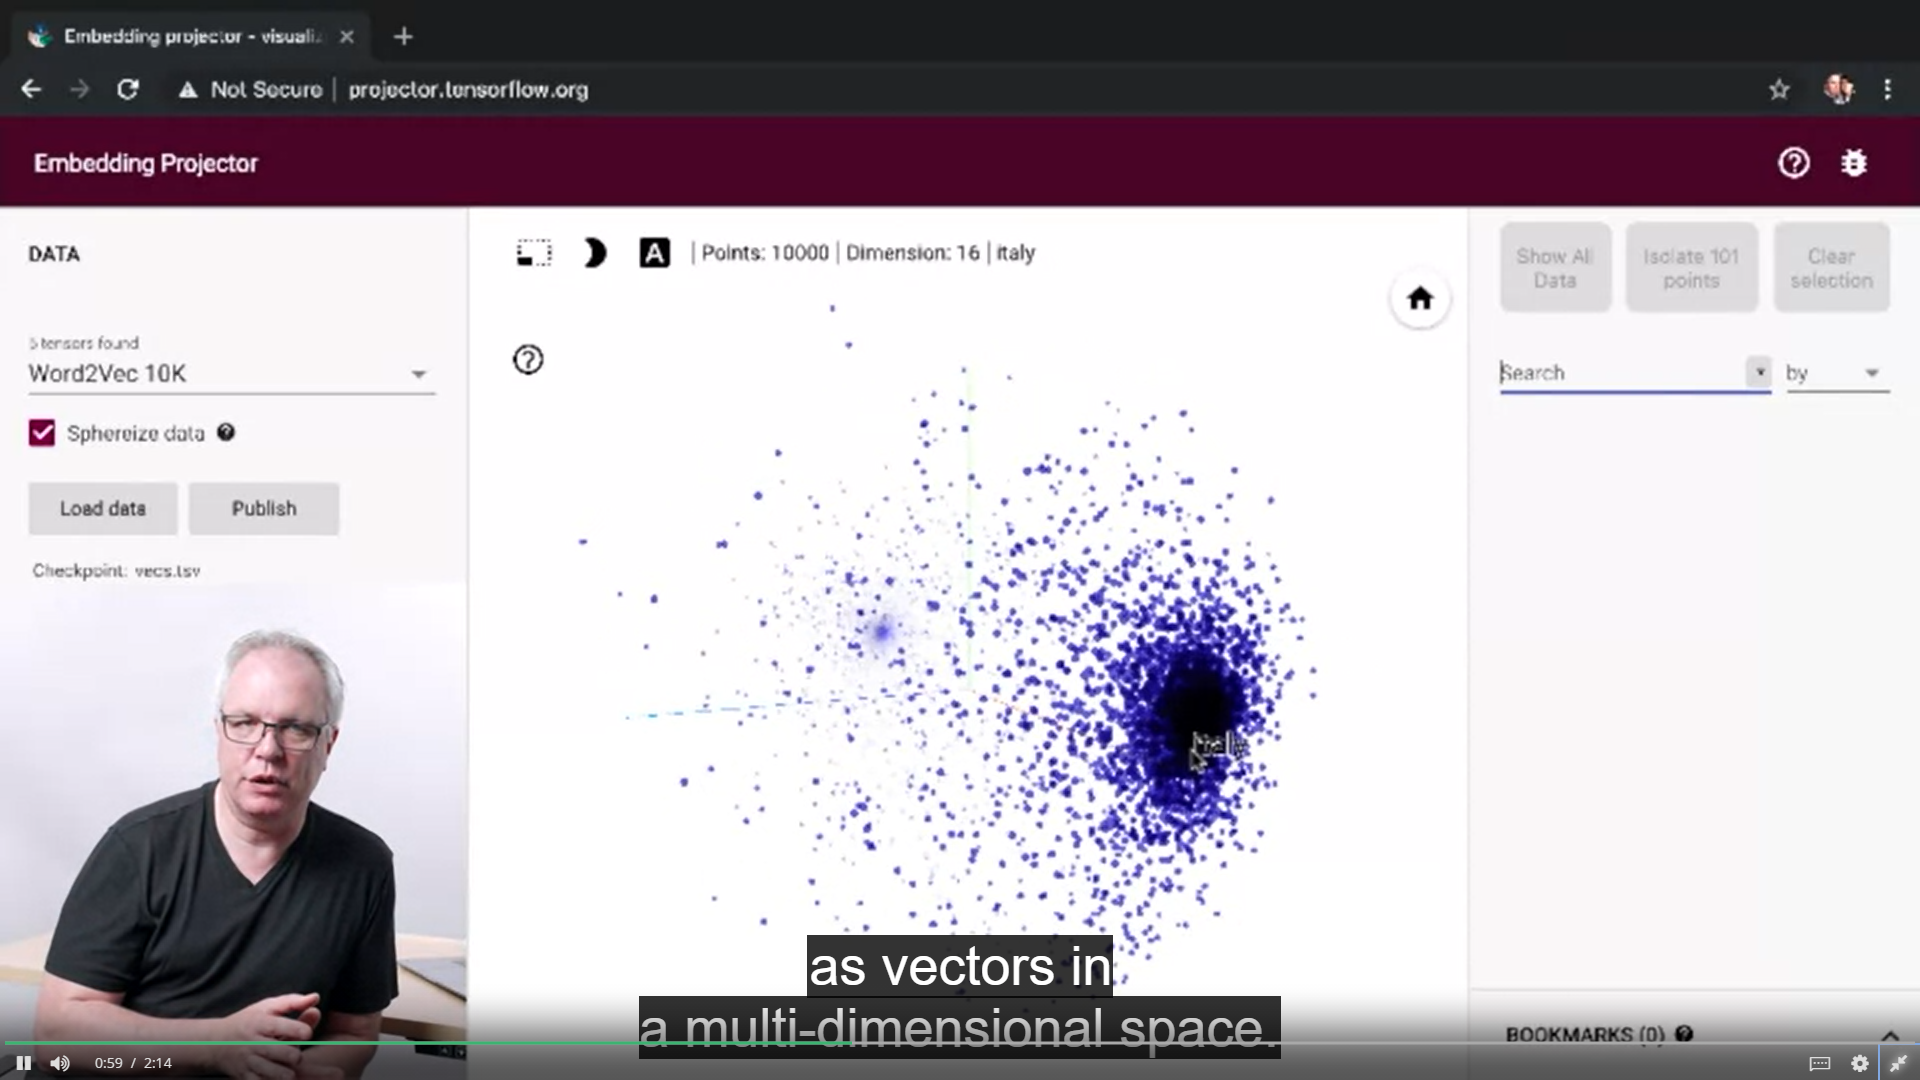

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
ROOT_DIR = '/content/drive/MyDrive/Coursera/Natural Language Processing Tensorflow'
%cd /content/drive/MyDrive/Coursera/Natural Language Processing Tensorflow

Mounted at /content/drive
/content/drive/MyDrive/Coursera/Natural Language Processing Tensorflow


##IMBD Classification

In [2]:
# !pip install -q tensorflow-datasets

In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.0


### Data preparation

In [4]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWB1KCH/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWB1KCH/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWB1KCH/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

In [6]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

Data is expected in numpy arrays so needs to be converted:

In [7]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

### Sentence Tokenisation procedure

In [8]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

### Define Neural Network

In [9]:
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), # size of sentence by the embedding dimension
    tf.keras.layers.Flatten(), # output shape is (None, 1920)
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_avg_pool = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), # size of sentence by the embedding dimension
    tf.keras.layers.GlobalAveragePooling1D(), # Alternative to the flatten function output shape is (None, 16)...This is quicker. this averages across the vector 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# How can we use vetors?
Use vectors in higher dimension and similar words start to cluster together trained using the labels. 

E.g. "dull" and "boring" show up on negative review alot so have simliar sentiments/vectors. 

In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[0]))
print(training_sentences[0])

? ? b this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining <OOV> like christopher <OOV> good name i could barely sit through it
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pa

In [11]:
model_flatten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_flatten.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 10

model_flatten.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 9s 8ms/step - loss: 0.5027 - accuracy: 0.7306 - val_loss: 0.3492 - val_accuracy: 0.8478
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2433 - accuracy: 0.9067 - val_loss: 0.3722 - val_accuracy: 0.8365
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 0.0909 - accuracy: 0.9776 - val_loss: 0.4542 - val_accuracy: 0.8276
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0279 - accuracy: 0.9962 - val_loss: 0.5198 - val_accuracy: 0.8273
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0118 - accuracy: 0.9984 - val_loss: 0.5796 - val_accuracy: 0.8252
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0052 - accuracy: 0.9993 - val_loss: 0.6646 - val_accuracy: 0.8174
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7008 - val_accuracy: 0.8211
Epoch 

In [13]:
model_avg_pool.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_avg_pool.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 10

model_avg_pool.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 0.5704 - accuracy: 0.7498 - val_loss: 0.4045 - val_accuracy: 0.8371
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3477 - accuracy: 0.8564 - val_loss: 0.3364 - val_accuracy: 0.8566
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2825 - accuracy: 0.8844 - val_loss: 0.3274 - val_accuracy: 0.8586
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2459 - accuracy: 0.9034 - val_loss: 0.3359 - val_accuracy: 0.8558
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2192 - accuracy: 0.9162 - val_loss: 0.3519 - val_accuracy: 0.8514
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1981 - accuracy: 0.9266 - val_loss: 0.3715 - val_accuracy: 0.8476
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1803 - accuracy: 0.9352 - val_loss: 0.3976 - val_accuracy: 0.8407
Epoch 

In [15]:
e = model_flatten.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [16]:
e = model_avg_pool.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [17]:
# Write vector and metadata output files
import io
import os

vecs_path = os.path.join(ROOT_DIR, 'vecs.tsv')
meta_path = os.path.join(ROOT_DIR, 'meta.tsv')

if not os.path.isfile(vecs_path):
    io.open(vecs_path, 'x', encoding='utf-8')

if not os.path.isfile(meta_path):
    io.open(meta_path, 'x', encoding='utf-8')

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
    

for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]

    out_m.write(f"{word}\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
    # out_v.write(f"\t{[str(x) for x in embedding]}\n")

out_v.close()
out_m.close()

In [21]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Classifier using sarcasm dataset

In [49]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Hyperparameters
vocab_size = 1000
embedding_dim = 16
max_length = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [50]:
!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
  
with open("./sarcasm.json", "r") as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/drive/My Drive/Coursera/Natural Language Processing Tensorflow/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 18.0MB/s]


Building a classifier from the sarcasm dataset

In [51]:
training_sentences = sentences[:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

training_sentences = np.array(training_sentences)
testing_sentences = np.array(testing_sentences)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [52]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [55]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.5222 - accuracy: 0.7325 - val_loss: 0.4097 - val_accuracy: 0.8094
Epoch 2/30
625/625 - 2s - loss: 0.3790 - accuracy: 0.8282 - val_loss: 0.3995 - val_accuracy: 0.8147
Epoch 3/30
625/625 - 2s - loss: 0.3637 - accuracy: 0.8328 - val_loss: 0.4030 - val_accuracy: 0.8149
Epoch 4/30
625/625 - 2s - loss: 0.3584 - accuracy: 0.8370 - val_loss: 0.4050 - val_accuracy: 0.8110
Epoch 5/30
625/625 - 2s - loss: 0.3565 - accuracy: 0.8379 - val_loss: 0.4048 - val_accuracy: 0.8146
Epoch 6/30
625/625 - 2s - loss: 0.3545 - accuracy: 0.8393 - val_loss: 0.4053 - val_accuracy: 0.8128
Epoch 7/30
625/625 - 2s - loss: 0.3533 - accuracy: 0.8391 - val_loss: 0.4067 - val_accuracy: 0.8146
Epoch 8/30
625/625 - 2s - loss: 0.3521 - accuracy: 0.8404 - val_loss: 0.4051 - val_accuracy: 0.8134
Epoch 9/30
625/625 - 2s - loss: 0.3510 - accuracy: 0.8408 - val_loss: 0.4045 - val_accuracy: 0.8123
Epoch 10/30
625/625 - 2s - loss: 0.3498 - accuracy: 0.8415 - val_loss: 0.4044 - val_accuracy: 0.8140

In [56]:
history.history

{'accuracy': [0.7325000166893005,
  0.8281999826431274,
  0.8328499794006348,
  0.8370000123977661,
  0.8379499912261963,
  0.8392500281333923,
  0.8391000032424927,
  0.8404499888420105,
  0.8407999873161316,
  0.8414999842643738,
  0.8414000272750854,
  0.8407999873161316,
  0.8429999947547913,
  0.8454999923706055,
  0.8469499945640564,
  0.8468499779701233,
  0.8504499793052673,
  0.8521999716758728,
  0.8525000214576721,
  0.8529999852180481,
  0.857450008392334,
  0.857200026512146,
  0.8593500256538391,
  0.8604000210762024,
  0.8600000143051147,
  0.8622999787330627,
  0.8629000186920166,
  0.8617500066757202,
  0.8638499975204468,
  0.8642500042915344],
 'loss': [0.5221731066703796,
  0.3789684474468231,
  0.36371660232543945,
  0.3583742678165436,
  0.3564866781234741,
  0.35453182458877563,
  0.3533216118812561,
  0.3521038293838501,
  0.3510144054889679,
  0.3498029410839081,
  0.3485089838504791,
  0.3478619456291199,
  0.3444790542125702,
  0.3406701683998108,
  0.3373326

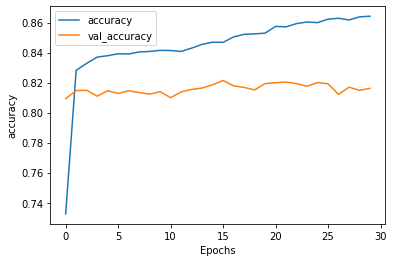

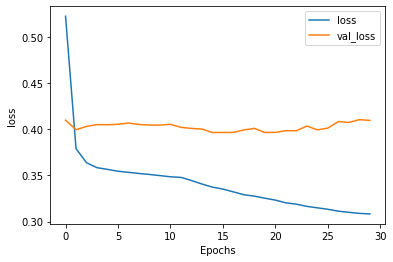

In [57]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history[f"val_{string}"])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, f"val_{string}"])

    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Pretokenized datasets

Some datasets are enbedded as plain_text, bytes, and subwords encoding. etc. 

In [58]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [59]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteE0ST6Y/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteE0ST6Y/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteE0ST6Y/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [64]:
train_data, test_data = imdb['train'], imdb['test']

In [65]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [73]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

### Encode and decode sample

In [74]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print(f'Tokenized string is {tokenized_string}')

original_string = tokenizer.decode(tokenized_string)
print(f'Original string {original_string}')

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
Original string TensorFlow, from basics to mastery


In [75]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_7 ( (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [79]:
num_epochs = 40

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/40
391/391 [==============================] - 8s 17ms/step - loss: 0.1730 - accuracy: 0.9402 - val_loss: 0.3164 - val_accuracy: 0.8784
Epoch 2/40
391/391 [==============================] - 7s 16ms/step - loss: 0.1637 - accuracy: 0.9448 - val_loss: 0.3257 - val_accuracy: 0.8776
Epoch 3/40
391/391 [==============================] - 7s 16ms/step - loss: 0.1549 - accuracy: 0.9469 - val_loss: 0.3296 - val_accuracy: 0.8777
Epoch 4/40
391/391 [==============================] - 7s 17ms/step - loss: 0.1474 - accuracy: 0.9507 - val_loss: 0.3483 - val_accuracy: 0.8717
Epoch 5/40
391/391 [==============================] - 7s 16ms/step - loss: 0.1414 - accuracy: 0.9516 - val_loss: 0.3556 - val_accuracy: 0.8737
Epoch 6/40
391/391 [==============================] - 7s 16ms/step - loss: 0.1336 - accuracy: 0.9549 - val_loss: 0.3584 - val_accuracy: 0.8734
Epoch 7/40
391/391 [==============================] - 7s 16ms/step - loss: 0.1281 - accuracy: 0.9569 - val_loss: 0.3746 - val_accuracy: 0.8702

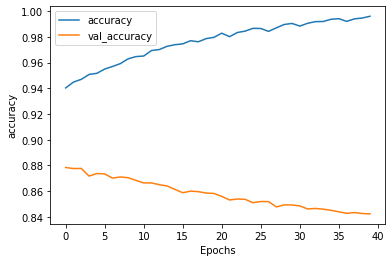

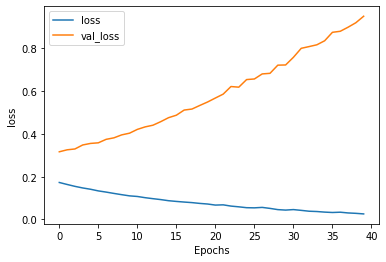

In [80]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [81]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sequences become more important when dealing with subwords but we're ignoring word positions. 